In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import nonlinear_QM_FPJPA as Fs
import wx_programs as wx
import bnc
from generator import *
from hardware_config import *
from values import *
from qubit_class import *
import standard_sequences.pinopi as pnp
import daq.daq_programs_homo as daq
import standard_sequences.spectroscopy as spec
import standard_sequences.rabi as rabi
import analysis

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

Qubit(ge_amp=1.2, ef_time=39, ROIF=0.10280000000000022, ro_amp=0.7, ro_dur=5000, ro_freq=6.7275, ge_time=28, RO_LO=6.6247, RO_LO_pwr=16, qubit_thr=[-5000, 5000], ROq3=6.583064, IQ_angle=240, qubit_id=q1, ge_ssm=-0.11, ef_ssm=-0.2525, ef_amp=1)
Qubit(ge_amp=1.2, ef_time=None, ROIF=0.030850000000000044, ro_amp=0.4, ro_dur=5000, ro_freq=6.65555, ge_time=40, RO_LO=6.6247, RO_LO_pwr=16, qubit_thr=[-5000, 5000], ROq3=6.583064, IQ_angle=220, qubit_id=q2, ge_ssm=-0.152, ef_ssm=-0.224, ef_amp=1)


In [3]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
num_steps = 3
reps = 5000
sweep_time = 500

In [4]:
pnp.pi_nopi_ge(0, 0, q1, q2, gen_vals = general_vals_dict)
pnp.pi_nopi_ge(1, 1, q1,q2,gen_vals = general_vals_dict)

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error


0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 5000
Buffers per acquistion: 5
DAQ samples per pattern: 8192
0, No error
Capturing 5 buffers. Press <enter> to abort
Capture completed in 2.502181 sec
Captured 5 buffers (1.998256 buffers per sec)
Captured 15360 records (6138.643931 records per sec)
Transferred 251658240 bytes (100575542.166679 bytes per sec)


<Figure size 800x800 with 0 Axes>

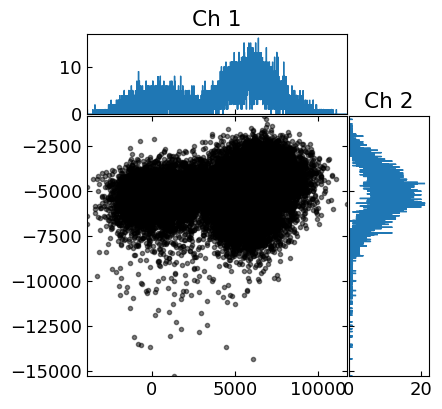

<Figure size 800x800 with 0 Axes>

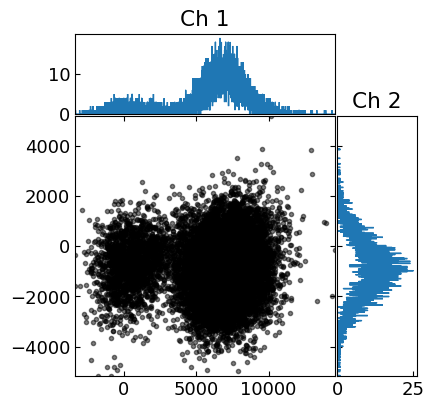

In [5]:
wx.wx_set_and_amplitude_and_offset(
    amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
)
(
    n_vs_pats_1,
    n_vs_pats_2,
    rec_avg_all,
    rec_all,
    rec_readout_1,
    rec_readout_2,
    rec_avg_vs_pats_1,
    rec_avg_vs_pats_2,
    rec_all_het_1,
    rec_all_het_2,
    bins_1,
    bins_2,
    counts_1,
    counts_2,
    prob_vs_pats_1,
    prob_vs_pats_2,
    n_readout_1,
    n_readout_2,
    rec_readout_vs_pats_1,
    rec_readout_vs_pats_2,
) = daq.run_daq_het_2q(
    q1.ROIF,
    q2.ROIF,
    deg_1=q1.IQ_angle,
    deg_2=q2.IQ_angle,
    num_patterns=num_steps,
    num_records_per_pattern=reps,
    ro_dur=q1.ro_dur,
    qubit_1_thr=q1.qubit_thr,
    qubit_2_thr=q2.qubit_thr,
    verbose=True,
)